In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv") 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Separate features and target variable
X = df.drop(columns=["Class"])
y = df["Class"]

In [7]:
# Standardizing the numerical features (Mean = 0, Std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [15]:
#  Define Neural Network Model
model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),  # Input Layer
    Dropout(0.2),  # Prevent Overfitting
    Dense(64, activation="relu"),  # Hidden Layer 1
    Dropout(0.3),
    Dense(32, activation="relu"),  # Hidden Layer 2
    Dense(1, activation="sigmoid")  # Output Layer (Binary Classification)
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,217 (20.38 KB)

 Trainable params: 5,217 (20.38 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#  Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate Model Performance
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to 0/1

Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9659 - loss: 0.0817 - val_accuracy: 0.9979 - val_loss: 0.0102
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9951 - loss: 0.0172 - val_accuracy: 0.9985 - val_loss: 0.0067
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9965 - loss: 0.0128 - val_accuracy: 0.9989 - val_loss: 0.0052
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9972 - loss: 0.0109 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9976 - loss: 0.0097 - val_accuracy: 0.9983 - val_loss: 0.0061
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9980 - loss: 0.0087 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9980 - loss: 0.0079 - val_accuracy: 0.9992 - val_loss: 0.0043
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 

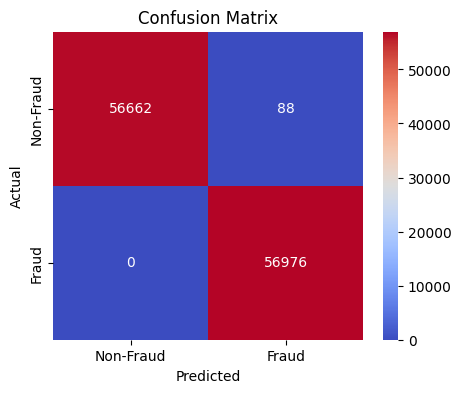

In [12]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC Score
roc_score = roc_auc_score(y_test, y_pred)
print(f"\nAUC-ROC Score: {roc_score:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


AUC-ROC Score: 0.9992


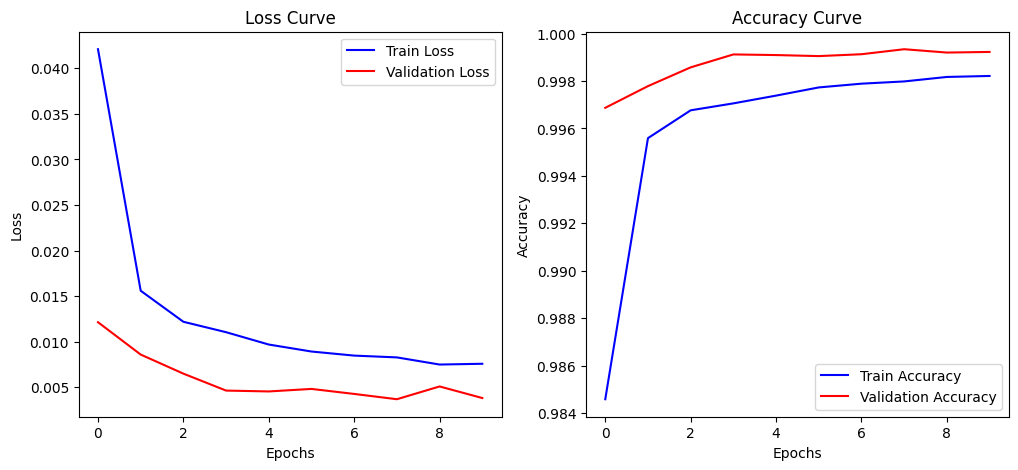

In [14]:
#  Plot Training Loss & Accuracy
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="red")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()